### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Import Data set and understanding the data

In [4]:
data = pd.read_csv('taxi_fare.csv')
data.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [5]:
data.shape

(212345, 18)

In [6]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude', 'RatecodeID',
       'store_and_fwd_flag', 'dropoff_longitude', 'dropoff_latitude',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount'],
      dtype='object')

In [7]:
data.dtypes

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID                 int64
store_and_fwd_flag        object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212345 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212345 non-null  int64  
 1   tpep_pickup_datetime   212345 non-null  object 
 2   tpep_dropoff_datetime  212345 non-null  object 
 3   passenger_count        212345 non-null  int64  
 4   pickup_longitude       212345 non-null  float64
 5   pickup_latitude        212345 non-null  float64
 6   RatecodeID             212345 non-null  int64  
 7   store_and_fwd_flag     212345 non-null  object 
 8   dropoff_longitude      212345 non-null  float64
 9   dropoff_latitude       212345 non-null  float64
 10  payment_type           212345 non-null  int64  
 11  fare_amount            212345 non-null  float64
 12  extra                  212345 non-null  float64
 13  mta_tax                212345 non-null  float64
 14  tip_amount             212345 non-nu

In [9]:
data.describe()

,VendorID,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000,212345.000000
mean,1.708338,1.766493,-73.112122,40.279405,1.034152,-73.144178,40.295648,1.324943,12.665588,0.048077,0.497662,1.809357,0.329049,0.299637,15.649355
std,0.454529,1.469647,7.936633,4.370714,0.494699,7.794599,4.293031,0.478255,10.875584,0.148103,0.037436,2.507419,2.028199,0.014094,13.592129
min,1.000000,0.000000,-121.933327,0.000000,1.000000,-121.933327,0.000000,1.000000,-52.000000,-0.500000,-0.500000,-2.700000,0.000000,-0.300000,-52.800000
25%,1.000000,1.000000,-73.990891,40.740292,1.000000,-73.990570,40.740089,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.300000
50%,2.000000,1.000000,-73.979469,40.755989,1.000000,-73.978691,40.755508,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.620000
75%,2.000000,2.000000,-73.963295,40.770283,1.000000,-73.964645,40.767475,2.000000,14.500000,0.000000,0.500000,2.360000,0.000000,0.300000,17.160000
max,2.000000,6.000000,0.000000,42.786934,99.000000,0.000000,42.786934,4.000000,819.500000,4.500000,0.500000,218.950000,661.080000,0.300000,832.800000


### 1.Data Cleaning

### Handling Missing/Null values

In [12]:
data.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

### Handling Duplicates

In [14]:
# Checking Total no of duplicate rows
duplicate_count = data.duplicated().sum()
print(f"Total duplicate rows: {duplicate_count}")

Total duplicate rows: 0


### Check and Convert to DateTime Formats

In [16]:
print(data[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].dtypes)

tpep_pickup_datetime     object
tpep_dropoff_datetime    object
dtype: object


In [17]:
# Convert to datetime 
data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

# Check data types of datetime columns
print(data[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].dtypes)

tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
dtype: object


### Handling Invalid and Irrelevant values

In [19]:
for col in data.columns:
  print(f"{col}:\n Unique values:",data[col].nunique(),"\n", data[col].unique())
  print()
  print()

VendorID:
 Unique values: 2 
 [1 2]


tpep_pickup_datetime:
 Unique values: 61208 
 <DatetimeArray>
['2016-03-01 00:00:00', '2016-03-01 00:00:01', '2016-03-01 00:00:02',
 '2016-03-01 00:00:03', '2016-03-01 00:00:04', '2016-03-01 00:00:05',
 '2016-03-01 00:00:06', '2016-03-01 00:00:07', '2016-03-01 00:00:08',
 '2016-03-01 00:00:09',
 ...
 '2016-03-01 12:15:29', '2016-03-01 12:15:30', '2016-03-01 12:15:31',
 '2016-03-01 12:15:32', '2016-03-01 12:15:33', '2016-03-01 12:15:34',
 '2016-03-01 12:15:35', '2016-03-01 12:15:36', '2016-03-01 12:15:37',
 '2016-03-01 12:15:38']
Length: 61208, dtype: datetime64[ns]


tpep_dropoff_datetime:
 Unique values: 63607 
 <DatetimeArray>
['2016-03-01 00:07:55', '2016-03-01 00:11:06', '2016-03-01 00:31:06',
 '2016-03-01 00:00:00', '2016-03-01 00:16:04', '2016-03-01 00:05:00',
 '2016-03-01 00:24:06', '2016-03-01 00:02:03', '2016-03-01 00:07:49',
 '2016-03-01 00:03:05',
 ...
 '2016-03-01 12:49:34', '2016-03-01 12:29:58', '2016-03-01 12:36:43',
 '2016-03-01 12:

### Remove Invalid Passenger Count

Because a trip with 0 or negative passengers doesn't make sense and usually signals bad or missing data

In [22]:
print(data['passenger_count'].value_counts())

passenger_count
1    149838
2     26371
5     14904
6     10328
3      7542
4      3353
0         9
Name: count, dtype: int64


In [23]:
data = data[data['passenger_count'] > 0]
print(data['passenger_count'].value_counts())

passenger_count
1    149838
2     26371
5     14904
6     10328
3      7542
4      3353
Name: count, dtype: int64


### Remove invalid fare amounts

Fare should always be positive. Zero or negative fares are invalid or indicate errors.

In [26]:
print(data['fare_amount'].value_counts())

fare_zero_neg = data[(data['fare_amount'] <= 0)]
print(f"Number of zero or negative fare_amount values: {len(fare_zero_neg)}")

fare_amount
6.00      10478
6.50      10445
7.00      10052
5.50       9995
7.50       9799
          ...  
118.75        1
88.50         1
110.50        1
88.88         1
224.50        1
Name: count, Length: 341, dtype: int64
Number of zero or negative fare_amount values: 154


In [27]:
print(f'Percentage of fare zero and negative = {len(fare_zero_neg)/len(data)*100}')

Percentage of fare zero and negative = 0.07252656167583453


In [28]:
data = data[data['fare_amount'] > 0]

print(len(data[(data['fare_amount'] <= 0)]))

0


### Next RatecodeID column

In [30]:
print(data['RatecodeID'].value_counts())

RatecodeID
1     207344
2       3869
5        441
3        438
4         88
6          1
99         1
Name: count, dtype: int64


In [31]:
data = data[data['RatecodeID'] < 99]

print(data['RatecodeID'].value_counts())

RatecodeID
1    207344
2      3869
5       441
3       438
4        88
6         1
Name: count, dtype: int64


### Extra Column

In [33]:
print(data['extra'].value_counts())

extra
0.0    191786
0.5     20362
1.0        33
Name: count, dtype: int64


0.0 is valid and acceptable. In fact, it simply means no extra charges were applied during that ride — which is normal.

### mta_tax

In New York City, the MTA (Metropolitan Transportation Authority) implements a tax on taxi trips, which is passed on to the passenger. 

This tax, known as the MTA Tax.

A 50-cent surcharge added to each taxi trip that originates in New York City and ends within the city or certain surrounding countries

In [36]:
print(data['mta_tax'].value_counts())

mta_tax
0.5    211445
0.0       736
Name: count, dtype: int64


Since there are 736 mta tax is 0.0, we would not able to conclude that those are rides with missing value or it is outside of the certain surrounding countries.

To conclude those we will require futher more details.

### Impute mta_tax = 0.0 values with 0.5 to maintain consistency in dataset.

In [39]:
data['mta_tax'] = data['mta_tax'].replace(0.0, 0.5)

print(data['mta_tax'].value_counts())

mta_tax
0.5    212181
Name: count, dtype: int64


### improvement_surcharge

In [41]:
print(data['improvement_surcharge'].value_counts())

improvement_surcharge
0.3    212172
0.0         9
Name: count, dtype: int64


In [42]:
print(data['tolls_amount'].value_counts().sort_values(ascending=False))

tolls_amount
0.00     200568
5.54      10896
12.50       162
10.50       112
2.54         64
          ...  
11.61         1
17.30         1
11.54         1
17.20         1
18.75         1
Name: count, Length: 109, dtype: int64


In [43]:
data = data[data['improvement_surcharge'] == 0.3]

print(data['improvement_surcharge'].value_counts())

improvement_surcharge
0.3    212172
Name: count, dtype: int64


### Toll_Amount

In [45]:
print(f'Maximum of the tolls_amount = {max(data['tolls_amount'])}')

Maximum of the tolls_amount = 661.08


In [46]:
count=data[data['tolls_amount']>40]
print("Number of values greater than 40 in 'tolls_amount':",len(count))

Number of values greater than 40 in 'tolls_amount': 1


In [47]:
count

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
121439,1,2016-03-01 07:44:08,2016-03-01 08:03:50,1,-73.923141,40.743954,1,N,-73.98748,40.744217,3,16.0,0.0,0.5,0.0,661.08,0.3,677.88


Since toll amount of this ride seem to varing too much from all other ride's it can be incorrect data

In [49]:
data=data[data['tolls_amount']<=40]

In [50]:
data

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.5,0.00,15.50,0.3,113.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212340,2,2016-03-01 12:15:37,2016-03-01 12:38:53,1,-73.955688,40.782261,1,N,-73.974915,40.751282,1,16.0,0.0,0.5,3.36,0.00,0.3,20.16
212341,2,2016-03-01 12:15:37,2016-03-01 12:38:22,1,-74.002197,40.715042,1,N,-73.976295,40.739609,1,15.5,0.0,0.5,2.00,0.00,0.3,18.30
212342,2,2016-03-01 12:15:37,2016-03-01 12:18:18,1,-73.991173,40.733170,1,N,-73.994324,40.728531,1,4.0,0.0,0.5,0.00,0.00,0.3,4.80
212343,1,2016-03-01 12:15:38,2016-03-01 12:22:47,2,-73.972099,40.786446,1,N,-73.955872,40.779755,2,7.0,0.0,0.5,0.00,0.00,0.3,7.80


In [51]:
# 1. Hour of pickup
data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour

In [52]:
# 2. Day of week (0=Mon, 6=Sun)
data['pickup_dayofweek'] = data['tpep_pickup_datetime'].dt.dayofweek

In [53]:
data['is_weekend'] = data['pickup_dayofweek'].apply(lambda x:1 if x>=5 else 0)

In [54]:
# 4. Night indicator (10 PM to 5 AM)
data['is_night'] = data['pickup_hour'].apply(lambda x: 1 if (x >= 22 or x <= 5) else 0)

In [55]:
# 5. Trip duration in minutes
data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds() / 60

In [56]:
# Count rows where duration is less than or equal to 0
invalid_duration_count = data[data['trip_duration'] <= 0]
print(f'Number of rows with zero or negative trip duration: {invalid_duration_count}')

Number of rows with zero or negative trip duration:         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3              2  2016-03-01 00:00:00   2016-03-01 00:00:00                3   
4              2  2016-03-01 00:00:00   2016-03-01 00:00:00                5   
5              2  2016-03-01 00:00:00   2016-03-01 00:00:00                5   
6              2  2016-03-01 00:00:00   2016-03-01 00:00:00                6   
20904          2  2016-03-10 08:57:08   2016-03-10 08:57:08                1   
...          ...                  ...                   ...              ...   
209583         1  2016-03-01 12:06:26   2016-03-01 12:06:26                1   
209846         1  2016-03-01 12:07:16   2016-03-01 12:07:16                1   
209992         1  2016-03-01 12:07:46   2016-03-01 12:07:46                4   
211663         1  2016-03-01 12:13:23   2016-03-01 12:13:23                1   
211810         1  2016-03-01 12:13:55   2016-03-01 12:13:55         

In [57]:
data.shape

(212171, 23)

In [58]:
data = data[data['trip_duration'] > 0]

In [59]:
data.shape

(212044, 23)

In [60]:
def haversine(row):
    R = 6371  # Earth radius in km
    lon1, lat1, lon2, lat2 = map(np.radians, [
        row['pickup_longitude'], row['pickup_latitude'],
        row['dropoff_longitude'], row['dropoff_latitude']
    ])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

# Apply the haversine function row-wise
data['trip_distance'] = data.apply(haversine, axis=1)

C:\Users\DURGA PRASATH\AppData\Local\Temp\ipykernel_22108\2566520576.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['trip_distance'] = data.apply(haversine, axis=1)


In [61]:
data = data.drop([
    'pickup_latitude', 
    'pickup_longitude', 
    'dropoff_latitude', 
    'dropoff_longitude',
    'tpep_pickup_datetime',
    'tpep_dropoff_datetime'
],axis=1)

In [62]:
data.columns

Index(['VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_hour',
       'pickup_dayofweek', 'is_weekend', 'is_night', 'trip_duration',
       'trip_distance'],
      dtype='object')

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212044 entries, 0 to 212344
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               212044 non-null  int64  
 1   passenger_count        212044 non-null  int64  
 2   RatecodeID             212044 non-null  int64  
 3   store_and_fwd_flag     212044 non-null  object 
 4   payment_type           212044 non-null  int64  
 5   fare_amount            212044 non-null  float64
 6   extra                  212044 non-null  float64
 7   mta_tax                212044 non-null  float64
 8   tip_amount             212044 non-null  float64
 9   tolls_amount           212044 non-null  float64
 10  improvement_surcharge  212044 non-null  float64
 11  total_amount           212044 non-null  float64
 12  pickup_hour            212044 non-null  int32  
 13  pickup_dayofweek       212044 non-null  int32  
 14  is_weekend             212044 non-null  i

In [64]:
for col in data.columns:
  print(f"{col}:\n Unique values:",data[col].nunique(),"\n", data[col].unique())
  print()
  print()

VendorID:
 Unique values: 2 
 [1 2]


passenger_count:
 Unique values: 6 
 [1 2 3 5 4 6]


RatecodeID:
 Unique values: 6 
 [1 2 5 3 4 6]


store_and_fwd_flag:
 Unique values: 2 
 ['N' 'Y']


payment_type:
 Unique values: 4 
 [1 3 2 4]


fare_amount:
 Unique values: 320 
 [9.0000e+00 1.1000e+01 5.4500e+01 2.0500e+01 5.5000e+00 2.3500e+01
 4.0000e+00 8.0000e+00 2.7000e+01 8.5000e+00 5.2000e+01 4.5000e+00
 2.8500e+01 1.7000e+01 1.3000e+01 3.1000e+01 5.0000e+00 3.3500e+01
 1.6000e+01 1.0500e+01 1.3500e+01 7.5000e+00 2.2500e+01 1.5500e+01
 1.2000e+01 6.0000e+00 1.1500e+01 9.5000e+00 1.7500e+01 1.5000e+01
 1.4000e+01 2.6500e+01 3.2500e+01 3.4500e+01 1.9000e+01 1.6500e+01
 2.7500e+01 6.5000e+00 2.9000e+01 7.0000e+00 2.1500e+01 1.0000e+01
 1.2500e+01 2.0000e+01 5.8340e+01 3.0000e+00 2.4500e+01 3.3000e+01
 3.5000e+00 3.1500e+01 1.8000e+01 1.8500e+01 2.2000e+01 1.9500e+01
 5.0000e+01 3.9000e+01 4.2500e+01 1.4500e+01 2.4000e+01 3.5500e+01
 2.1000e+01 3.4000e+01 2.3000e+01 3.9500e+01 2.8000e+01 2.

## EDA

### Univariate analysis

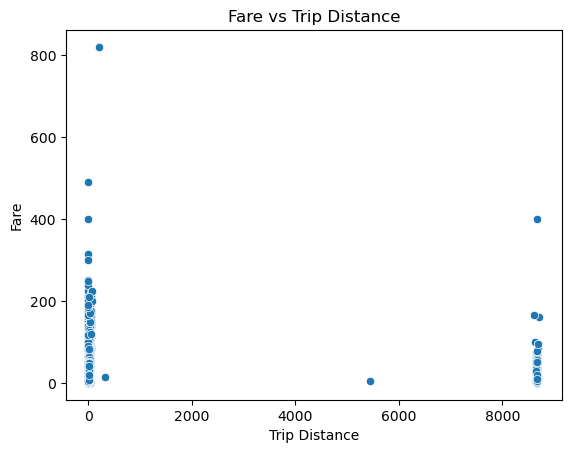

In [67]:
#1.Fare vs Distance
plt.title('Fare vs Trip Distance')
sns.scatterplot(data=data, x='trip_distance',y='fare_amount')
plt.ylabel('Fare')
plt.xlabel('Trip Distance')
plt.show()

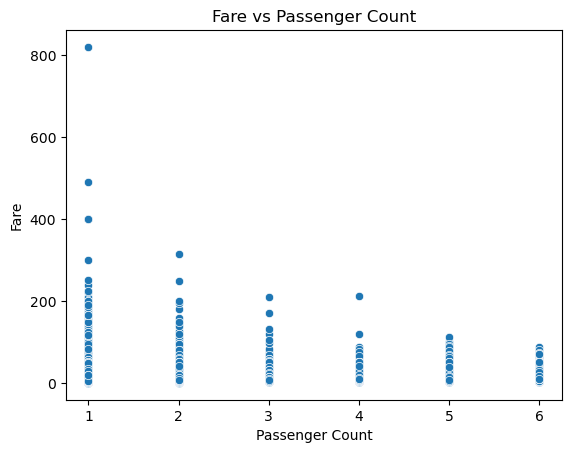

In [68]:
#2.Fare vs Passenger Count
plt.title('Fare vs Passenger Count')
sns.scatterplot(data=data , x='passenger_count',y='fare_amount')
plt.ylabel('Fare')
plt.xlabel('Passenger Count')
plt.show()

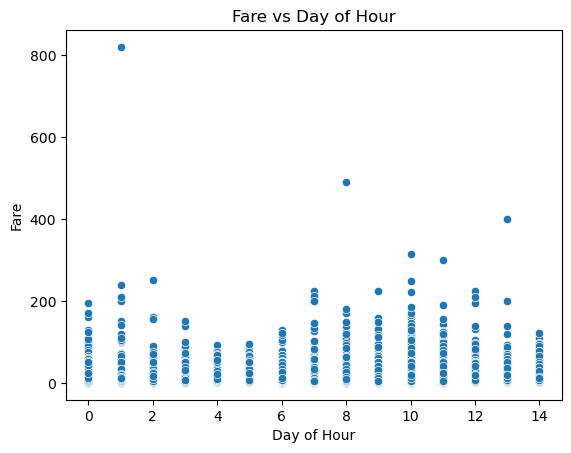

In [69]:
#3.Fare vs Day of hour(pickup_hour)
plt.title('Fare vs Day of Hour')
sns.scatterplot(data=data,x='pickup_hour',y='fare_amount')
plt.ylabel('Fare')
plt.xlabel('Day of Hour')
plt.show()

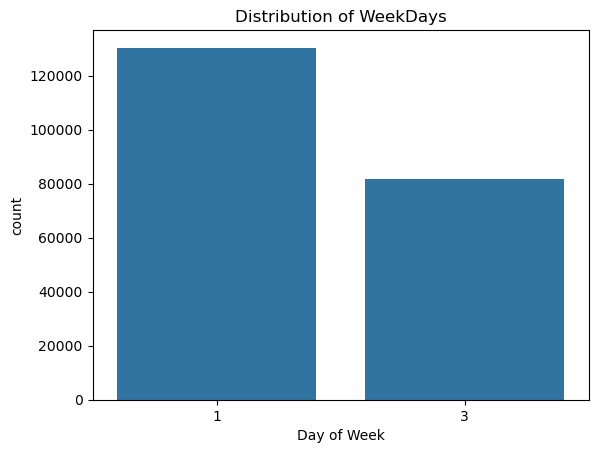

In [70]:
#4.Distribution of WeekDays
plt.title('Distribution of WeekDays')
sns.countplot(data=data,x='pickup_dayofweek')
plt.xlabel('Day of Week')
plt.show()

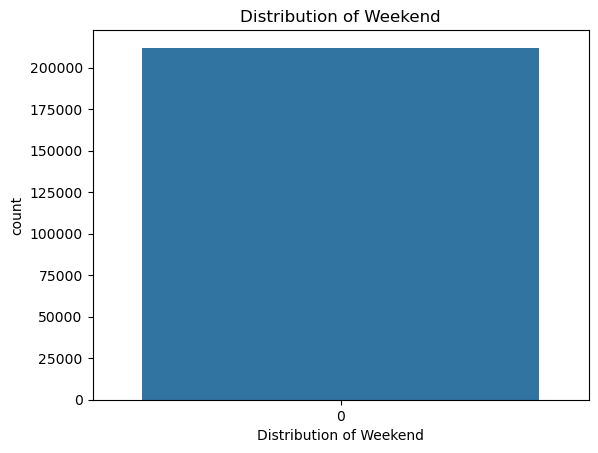

In [71]:
#5.Distribution of Weekends
plt.title('Distribution of Weekend')
sns.countplot(data=data,x='is_weekend')
plt.xlabel('Distribution of Weekend')
plt.show()

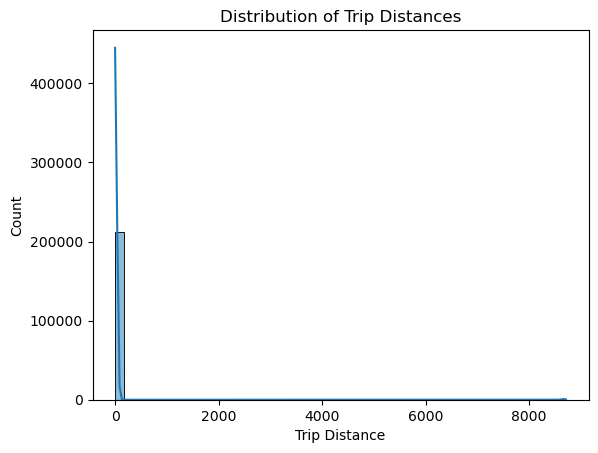

In [72]:
#6.Trip Distance Distribution
plt.title('Distribution of Trip Distances')
sns.histplot(data=data['trip_distance'],bins=50,kde=True)
plt.xlabel('Trip Distance')
plt.show()

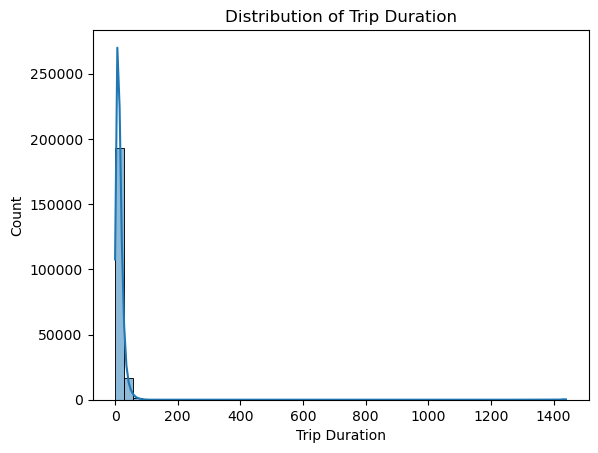

In [73]:
#7.Trip Duration Distribution
plt.title('Distribution of Trip Duration')
sns.histplot(data=data['trip_duration'],bins=50,kde=True)
plt.xlabel('Trip Duration')
plt.show()

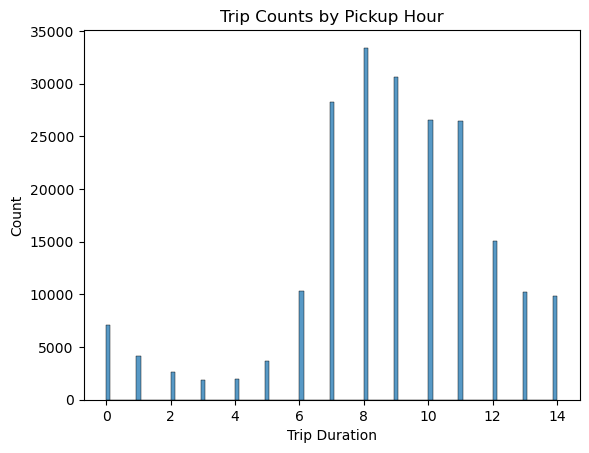

In [74]:
#8.Pickup Hour Distribution
plt.title('Trip Counts by Pickup Hour')
sns.histplot(data=data['pickup_hour'])
plt.xlabel('Trip Duration')
plt.show()

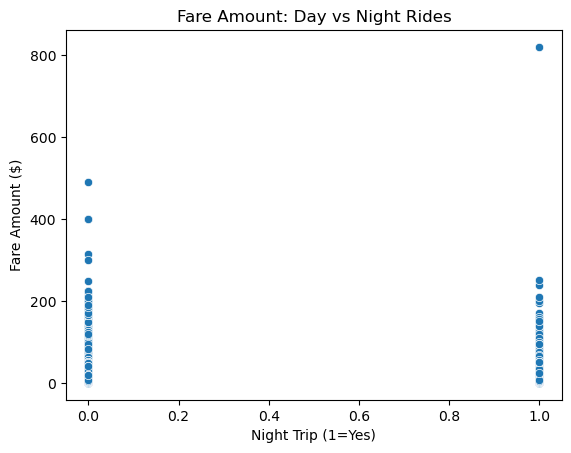

In [75]:
#9.Pickup Hour Distribution
sns.scatterplot(data=data, x='is_night', y='fare_amount')
plt.title('Fare Amount: Day vs Night Rides')
plt.xlabel('Night Trip (1=Yes)')
plt.ylabel('Fare Amount ($)')
plt.show()

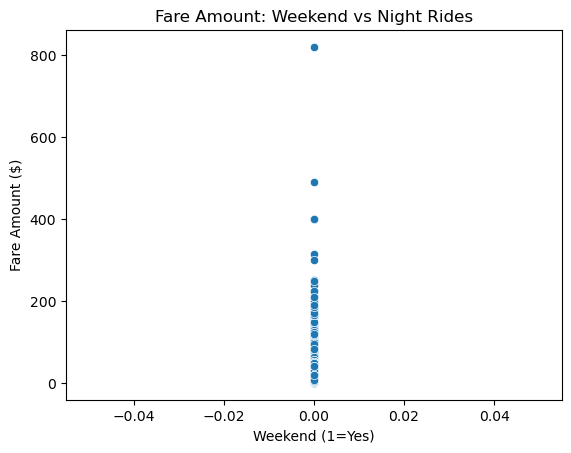

In [76]:
#9.Pickup Hour Distribution
sns.scatterplot(data=data, x='is_weekend', y='fare_amount')
plt.title('Fare Amount: Weekend vs Night Rides')
plt.xlabel('Weekend (1=Yes)')
plt.ylabel('Fare Amount ($)')
plt.show()

## Outlier Treatment

In [78]:
numerical_cols=['trip_distance',
                'trip_duration',
                'total_amount', 
                'fare_amount', 
                'tip_amount', 
                'tolls_amount']

In [79]:
#Check skewness for data
print("Skewness (Before Outliers Handling):")
skew =data[numerical_cols].skew()
print(skew.sort_values(ascending=False))

Skewness (Before Outliers Handling):
trip_duration    24.518999
trip_distance    22.681003
tip_amount        7.667440
fare_amount       6.097390
tolls_amount      5.316003
total_amount      4.820102
dtype: float64


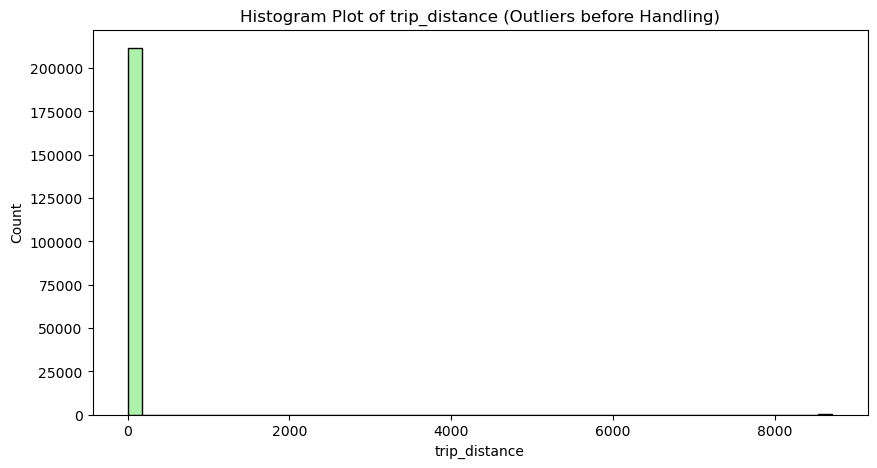

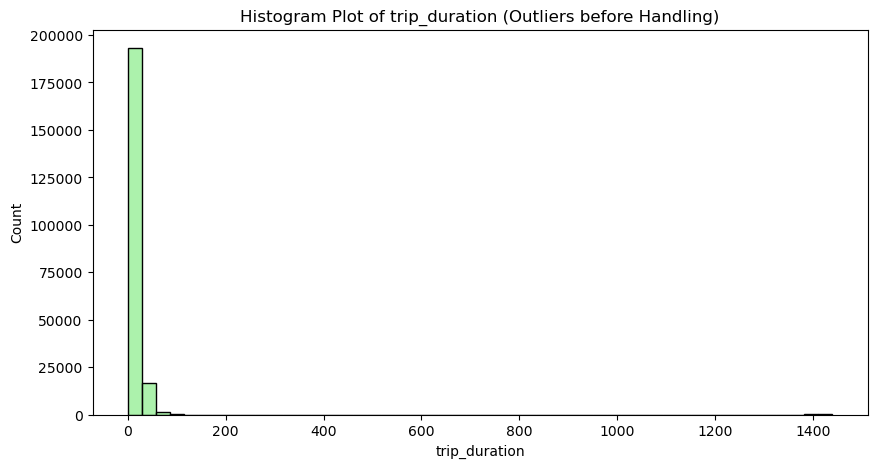

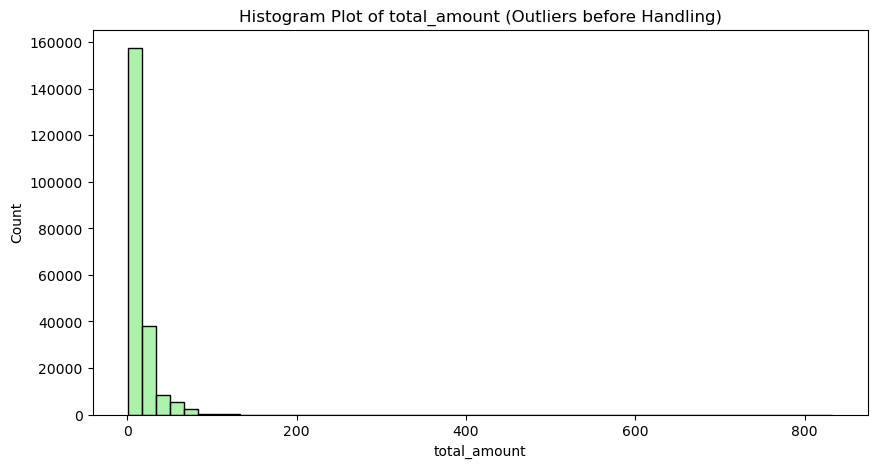

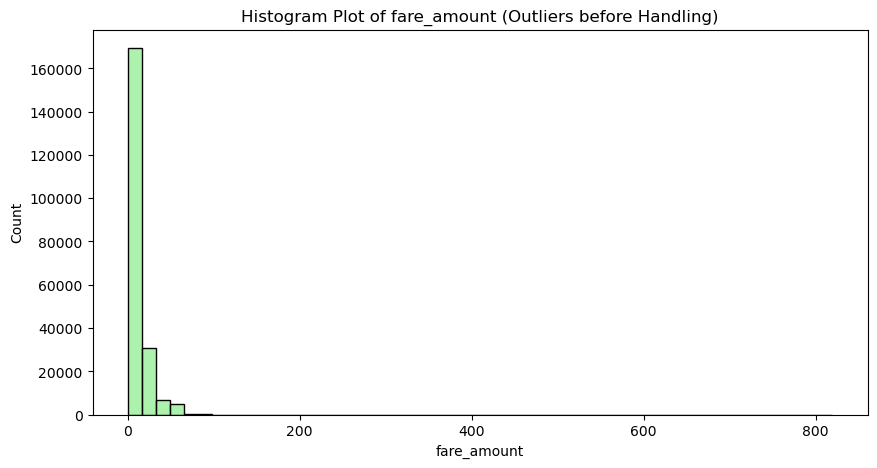

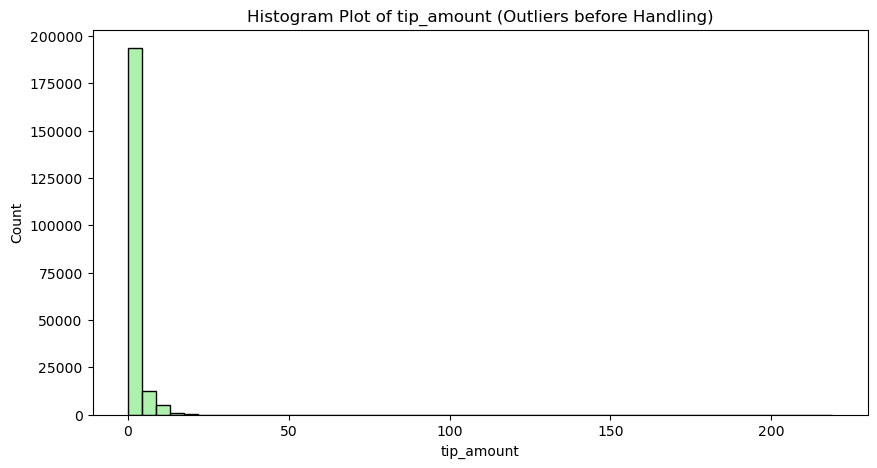

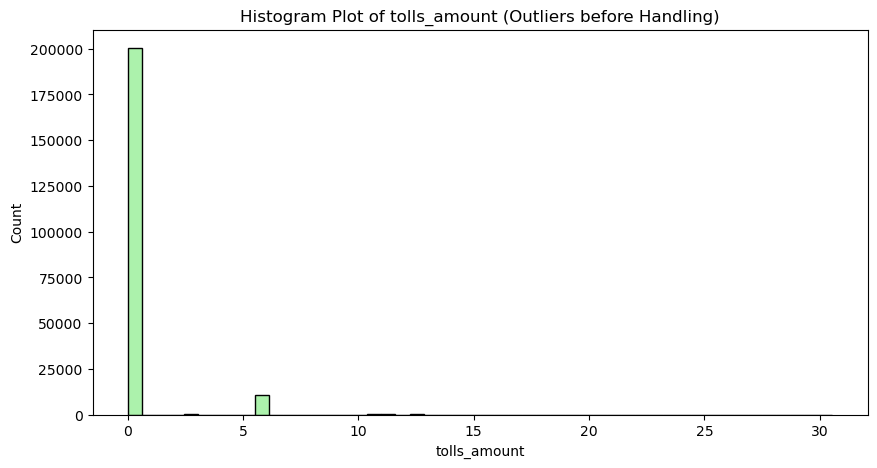

In [80]:
for col in numerical_cols:
    plt.figure(figsize = (10,5))
    sns.histplot(data=data[col],color='lightgreen',bins=50)
    plt.title(f'Histogram Plot of {col} (Outliers before Handling)')
    plt.show()

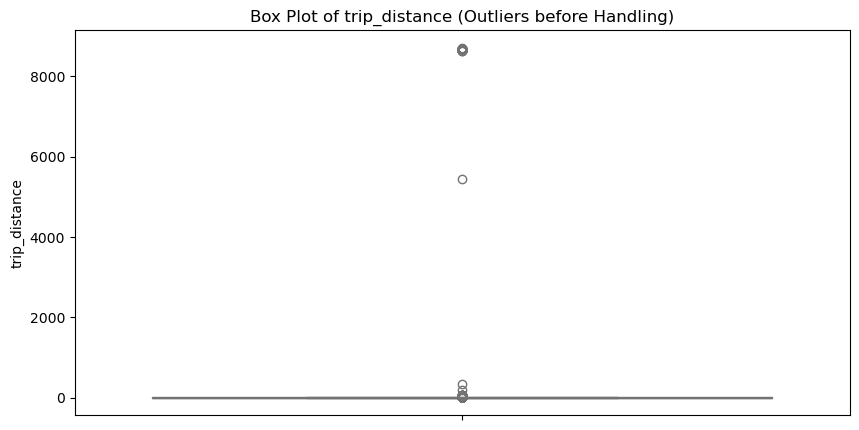

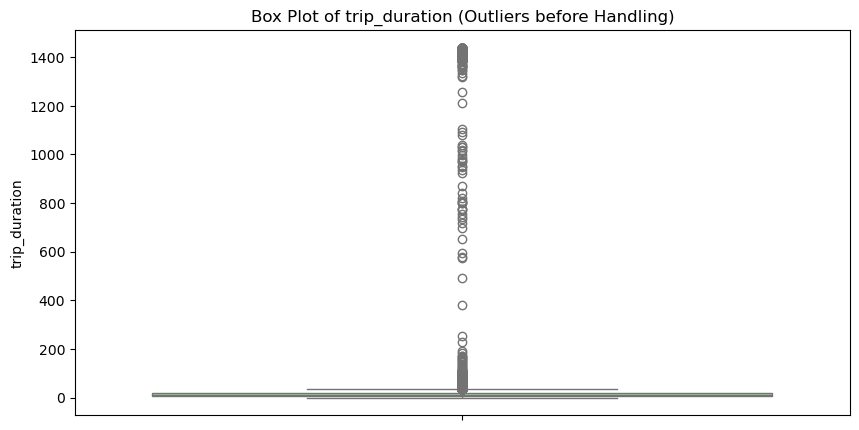

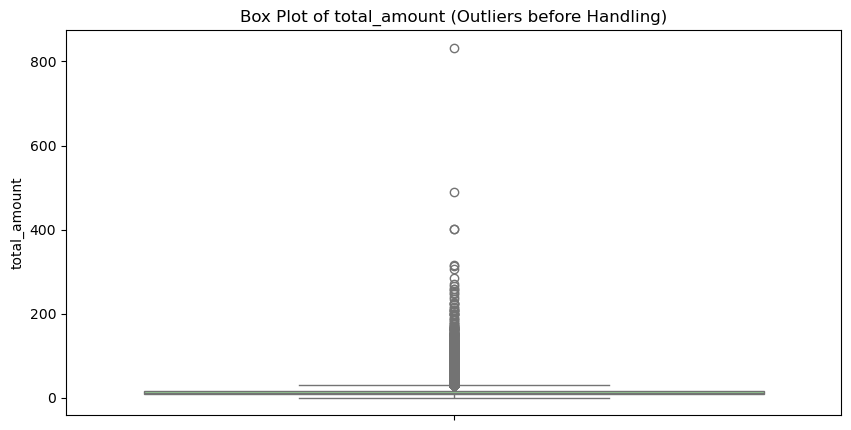

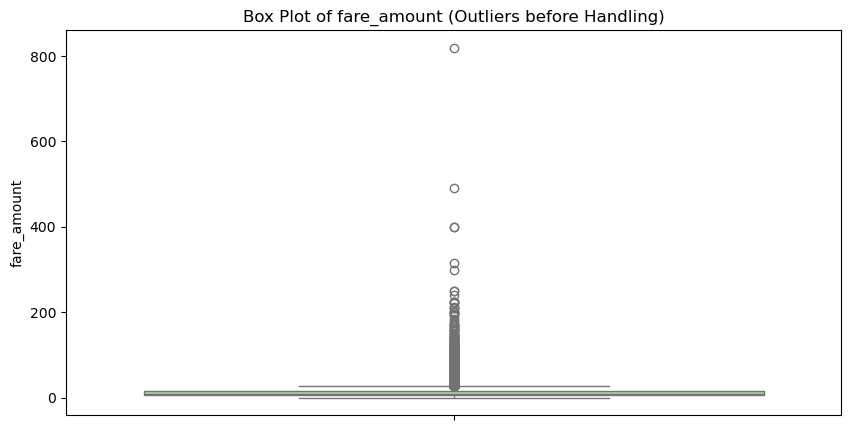

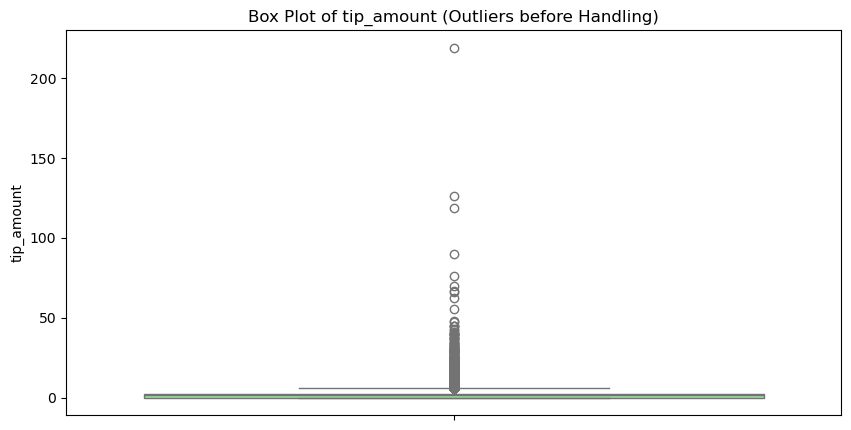

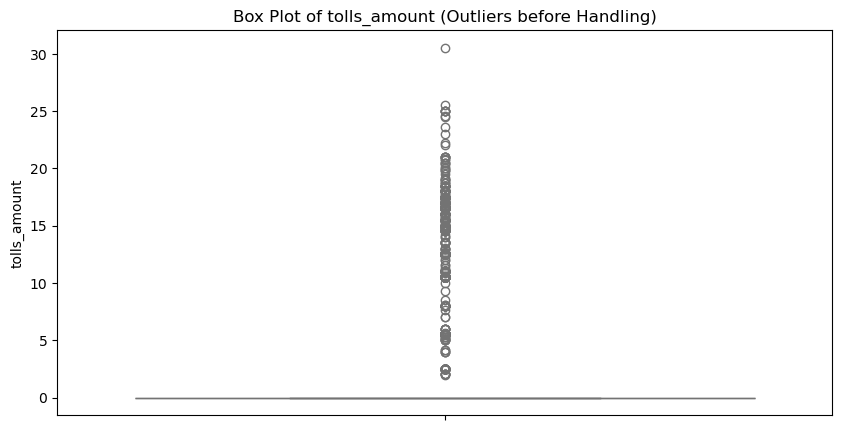

In [81]:
for col in numerical_cols:
    plt.figure(figsize = (10,5))
    sns.boxplot(data=data[col],color='lightgreen')
    plt.title(f'Box Plot of {col} (Outliers before Handling)')
    plt.show()

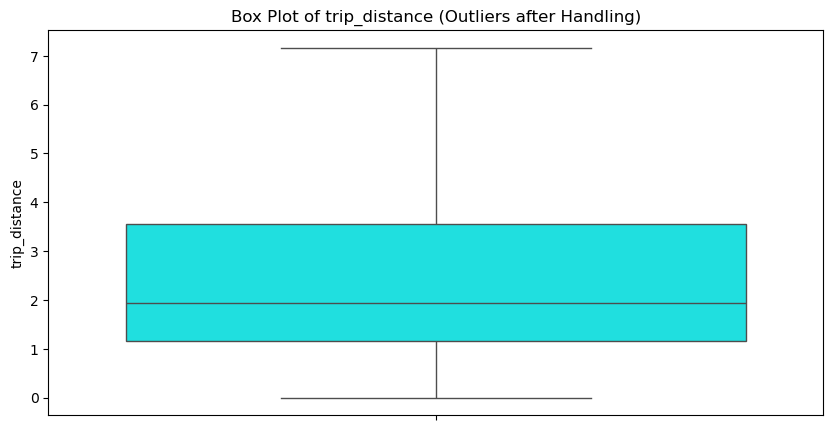

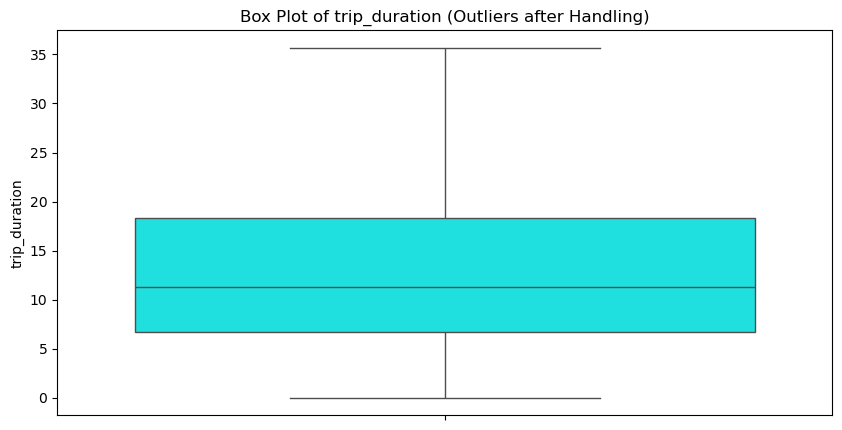

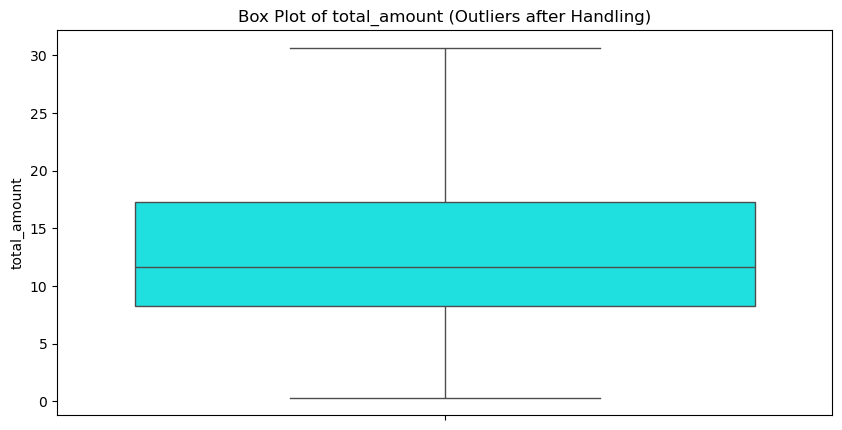

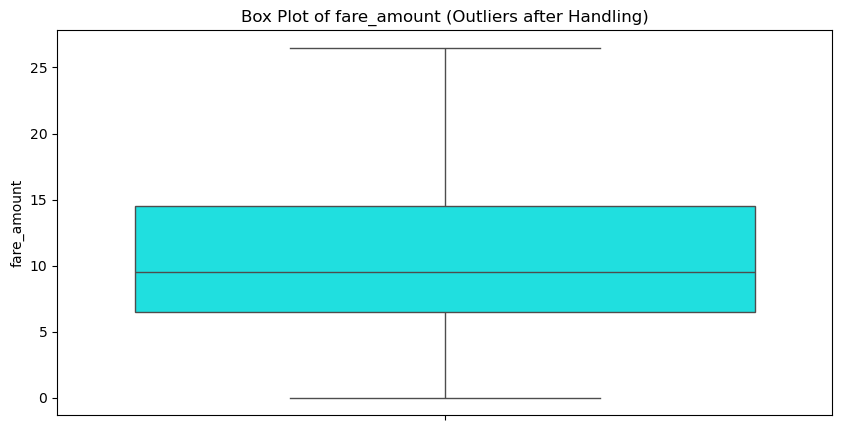

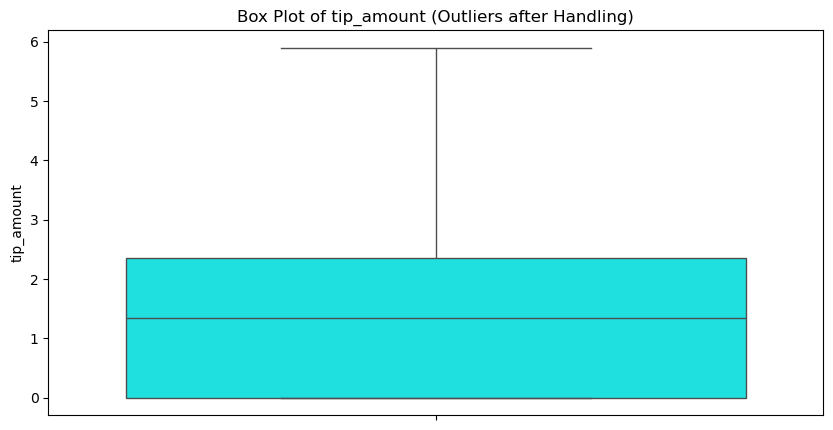

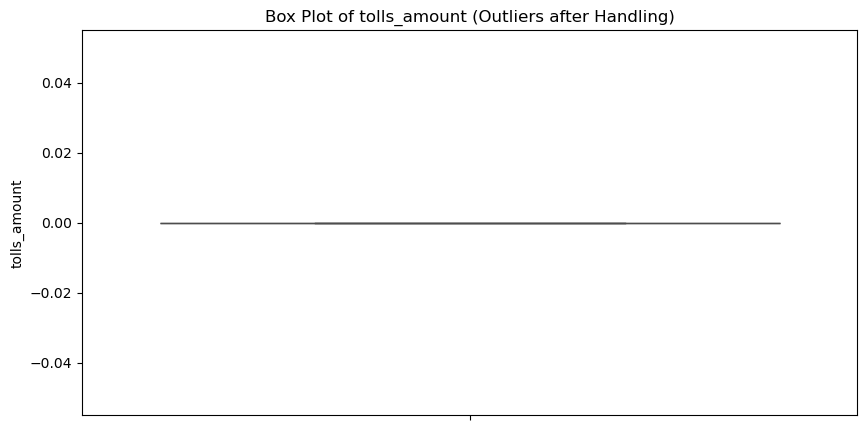

In [82]:
for col in numerical_cols:
    q1 = np.percentile(data[col],25)
    q3 = np.percentile(data[col],75)
    IQR = q3 - q1
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    data[col] = np.clip(data[col], lower_bound, upper_bound)
    
for col in numerical_cols:
    plt.figure(figsize=(10,5))
    sns.boxplot(data=data[col],color = 'cyan')
    plt.title(f'Box Plot of {col} (Outliers after Handling)')
    plt.show()

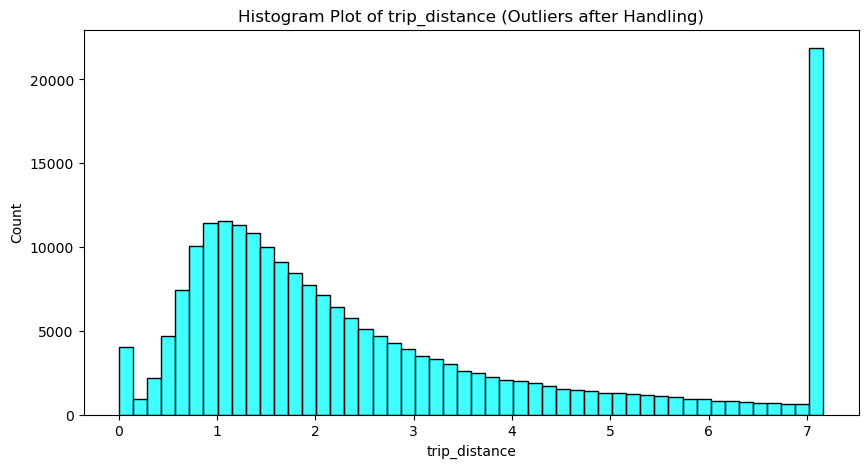

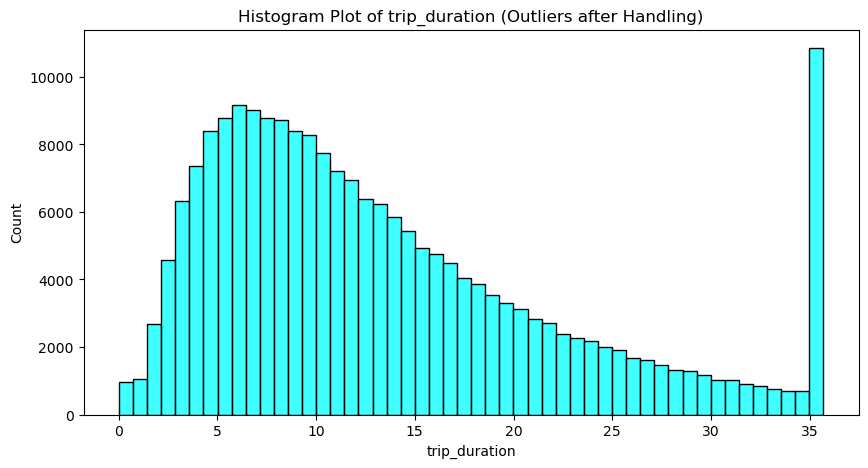

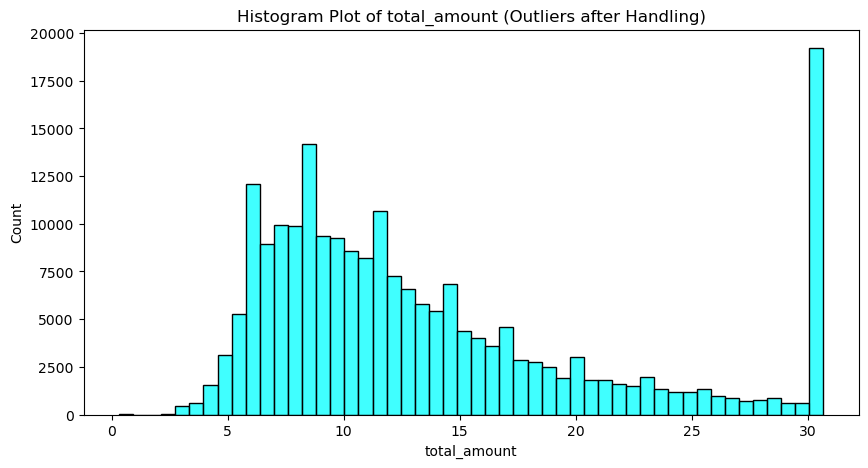

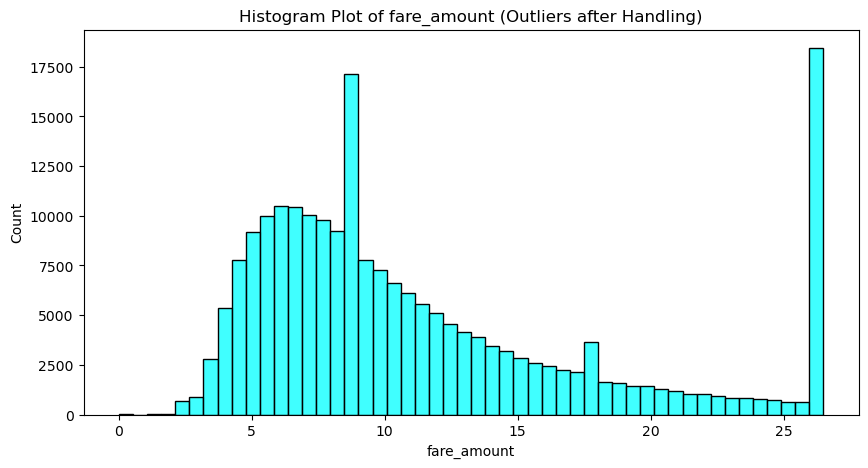

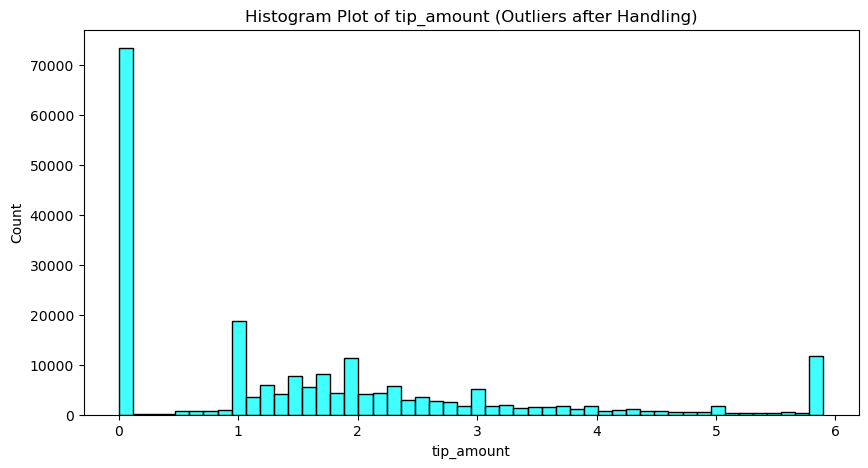

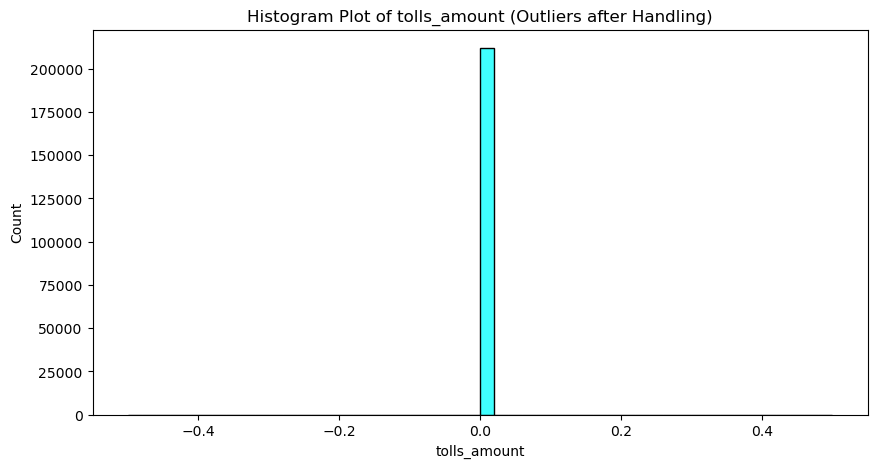

In [83]:
for col in numerical_cols:
    plt.figure(figsize=(10,5))
    sns.histplot(data=data[col],color = 'cyan',bins=50)
    plt.title(f'Histogram Plot of {col} (Outliers after Handling)')
    plt.show()

In [84]:
print('Skewness (After Outliers Handling)')
skew = data[numerical_cols].skew()
print(skew.sort_values(ascending=False))

Skewness (After Outliers Handling)
trip_distance    1.077904
fare_amount      1.076018
tip_amount       1.067522
total_amount     1.047148
trip_duration    0.960260
tolls_amount     0.000000
dtype: float64


### Bivariant Analysis

In [86]:
data.columns

Index(['VendorID', 'passenger_count', 'RatecodeID', 'store_and_fwd_flag',
       'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount',
       'tolls_amount', 'improvement_surcharge', 'total_amount', 'pickup_hour',
       'pickup_dayofweek', 'is_weekend', 'is_night', 'trip_duration',
       'trip_distance'],
      dtype='object')

In [87]:
#Checking Correlation of selected numerical feature with Target feature
cols = [ 'VendorID','fare_amount', 'extra', "mta_tax","trip_duration",
        "trip_distance",'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount','pickup_hour']

correlation_data = data[cols].corr()

print(correlation_data['total_amount'].sort_values(ascending=False))


total_amount             1.000000
fare_amount              0.986612
trip_duration            0.900672
trip_distance            0.883577
tip_amount               0.662682
extra                    0.035932
VendorID                 0.025429
pickup_hour              0.002167
mta_tax                       NaN
tolls_amount                  NaN
improvement_surcharge         NaN
Name: total_amount, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

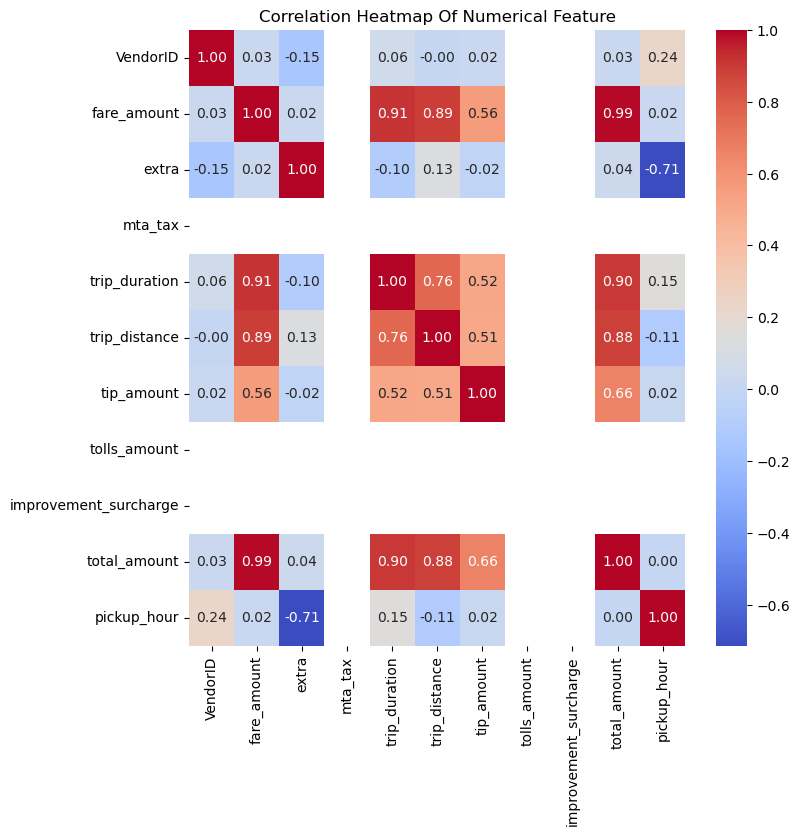

In [88]:
plt.figure(figsize=(8,8))
sns.heatmap(data=correlation_data,annot =True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap Of Numerical Feature')
plt.show

# Correlation of features towards the total_amount
    fare_amount           =  Strong relation(Strong multicollinearity)
    trip_duration_minutes =  Moderate relation
    trip_distance         =  Moderate relation
    tip_amount            =  Moderate relation
    extra                 =  Weak relation
    pickup_hour           =  Weak relation
    mta_tax               =  No relation (constant)
    improvement_surcharge =  No relation (constant)
    tolls_amount          =  No relation

### Since there are no, weak relation between the mta_tax, improvement_surcharge, tolls_amount, extra , pickup_hour we can drop those feature to build the model.

In [91]:
data = data.drop(['fare_amount','tip_amount','VendorID', 'store_and_fwd_flag',
       'extra', 'mta_tax', 'pickup_hour','tolls_amount','improvement_surcharge'],axis=1)

In [92]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212044 entries, 0 to 212344
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   passenger_count   212044 non-null  int64  
 1   RatecodeID        212044 non-null  int64  
 2   payment_type      212044 non-null  int64  
 3   total_amount      212044 non-null  float64
 4   pickup_dayofweek  212044 non-null  int32  
 5   is_weekend        212044 non-null  int64  
 6   is_night          212044 non-null  int64  
 7   trip_duration     212044 non-null  float64
 8   trip_distance     212044 non-null  float64
dtypes: float64(3), int32(1), int64(5)
memory usage: 15.4 MB


In [93]:
data.shape

(212044, 9)

In [94]:
data.columns

Index(['passenger_count', 'RatecodeID', 'payment_type', 'total_amount',
       'pickup_dayofweek', 'is_weekend', 'is_night', 'trip_duration',
       'trip_distance'],
      dtype='object')

In [95]:
#Checking Correlation of selected numerical feature with Target feature
cols = ['is_weekend', 'pickup_dayofweek', 'is_night', 'total_amount']

correlation_data = data[cols].corr()

print(correlation_data['total_amount'].sort_values(ascending=False))

total_amount        1.000000
is_night            0.058243
pickup_dayofweek    0.032241
is_weekend               NaN
Name: total_amount, dtype: float64


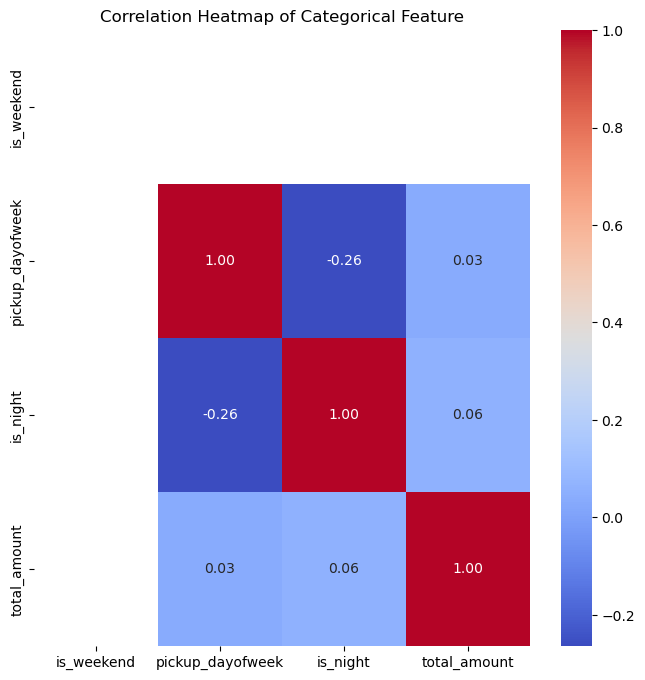

In [96]:
plt.figure(figsize=(8,8))
sns.heatmap(data=correlation_data,cmap='coolwarm',annot = True,fmt ='.2f')
plt.title('Correlation Heatmap of Categorical Feature')
plt.show()

### Correlation of feature towards total_amount

    is_weekend       = No Correlation
    pickup_dayofweek = Weak Correlation
    is_night         = Slightly strong correlation then pickUp_dayofweek
    

We can drop the  is_weekend and pickup_dayofweek there correlation is weak

In [99]:
data = data.drop(['is_weekend','pickup_dayofweek'],axis = 1)

In [100]:
data.columns

Index(['passenger_count', 'RatecodeID', 'payment_type', 'total_amount',
       'is_night', 'trip_duration', 'trip_distance'],
      dtype='object')

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212044 entries, 0 to 212344
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   passenger_count  212044 non-null  int64  
 1   RatecodeID       212044 non-null  int64  
 2   payment_type     212044 non-null  int64  
 3   total_amount     212044 non-null  float64
 4   is_night         212044 non-null  int64  
 5   trip_duration    212044 non-null  float64
 6   trip_distance    212044 non-null  float64
dtypes: float64(3), int64(4)
memory usage: 12.9 MB


### One Hot Encoding

In [103]:
data = pd.get_dummies(data,columns=['RatecodeID','payment_type'],drop_first=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212044 entries, 0 to 212344
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   passenger_count  212044 non-null  int64  
 1   total_amount     212044 non-null  float64
 2   is_night         212044 non-null  int64  
 3   trip_duration    212044 non-null  float64
 4   trip_distance    212044 non-null  float64
 5   RatecodeID_2     212044 non-null  bool   
 6   RatecodeID_3     212044 non-null  bool   
 7   RatecodeID_4     212044 non-null  bool   
 8   RatecodeID_5     212044 non-null  bool   
 9   RatecodeID_6     212044 non-null  bool   
 10  payment_type_2   212044 non-null  bool   
 11  payment_type_3   212044 non-null  bool   
 12  payment_type_4   212044 non-null  bool   
dtypes: bool(8), float64(3), int64(2)
memory usage: 11.3 MB


In [104]:
Transformed_bool_cols = ['RatecodeID_2','RatecodeID_3','RatecodeID_4','RatecodeID_5','RatecodeID_6',
                         'payment_type_2','payment_type_3','payment_type_4']
data[Transformed_bool_cols] = data[Transformed_bool_cols].astype(int)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 212044 entries, 0 to 212344
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   passenger_count  212044 non-null  int64  
 1   total_amount     212044 non-null  float64
 2   is_night         212044 non-null  int64  
 3   trip_duration    212044 non-null  float64
 4   trip_distance    212044 non-null  float64
 5   RatecodeID_2     212044 non-null  int32  
 6   RatecodeID_3     212044 non-null  int32  
 7   RatecodeID_4     212044 non-null  int32  
 8   RatecodeID_5     212044 non-null  int32  
 9   RatecodeID_6     212044 non-null  int32  
 10  payment_type_2   212044 non-null  int32  
 11  payment_type_3   212044 non-null  int32  
 12  payment_type_4   212044 non-null  int32  
dtypes: float64(3), int32(8), int64(2)
memory usage: 16.2 MB


In [106]:
data.head()

,passenger_count,total_amount,is_night,trip_duration,trip_distance,RatecodeID_2,RatecodeID_3,RatecodeID_4,RatecodeID_5,RatecodeID_6,payment_type_2,payment_type_3,payment_type_4
0,1,12.350,1,7.916667,3.138096,0,0,0,0,0,0,0,0
1,1,15.350,1,11.100000,4.303331,0,0,0,0,0,0,0,0
2,2,30.675,1,31.100000,7.168024,0,0,0,0,0,0,0,0
7,1,21.800,1,16.050000,7.168024,0,0,0,0,0,0,1,0
8,1,8.800,1,4.983333,0.837395,0,0,0,0,0,0,0,0


In [107]:
data.shape

(212044, 13)

In [108]:
data = data.reset_index(drop=True)

In [109]:
data.to_csv('data_cleaned.csv',index=False)

### Model Building

In [111]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, root_mean_squared_error

In [112]:
df = pd.read_csv("data_cleaned.csv")

In [113]:
X = df.drop('total_amount',axis=1)
y = df['total_amount']

In [114]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [115]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest Regressor": RandomForestRegressor(),
    "GradientBoostingRegressor": GradientBoostingRegressor()
}
# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  

    # Compute evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    }

# Convert results to DataFrame
results_df = pd.DataFrame(results)
results_df

,Linear Regression,Ridge,Lasso,Random Forest Regressor,GradientBoostingRegressor
MAE,1.123465,1.123471,1.376744,0.852733,0.831989
MSE,4.098114,4.098297,5.747627,2.676619,2.325509
RMSE,2.024380,2.024425,2.397421,1.636038,1.524962
R2 Score,0.926471,0.926468,0.896876,0.951976,0.958275


In [116]:
data.columns

Index(['passenger_count', 'total_amount', 'is_night', 'trip_duration',
       'trip_distance', 'RatecodeID_2', 'RatecodeID_3', 'RatecodeID_4',
       'RatecodeID_5', 'RatecodeID_6', 'payment_type_2', 'payment_type_3',
       'payment_type_4'],
      dtype='object')

In [118]:
import pickle

best_model = models['GradientBoostingRegressor']
filename = 'gb_model.pkl'
# Save the best XGBoost model
with open(filename, "wb") as file:
    pickle.dump(best_model, file)

print(f"✅ Model saved as {filename}")

✅ Model saved as gb_model.pkl


In [218]:
model = pd.read_pickle('gb_model.pkl')
print(model)

GradientBoostingRegressor()


In [220]:
with open(r"gb_model.pkl", "rb") as f:
    model = pickle.load(f)

In [222]:
print(model)

GradientBoostingRegressor()
